# TD 6 : Le perceptron
---

Dans ce dernier TD, nous allons explorer le fonctionnement du perceptron, le véritable précurseur des algorithmes les plus puissants dans l'*apprentissage machine* d'aujourd'hui, tel l'apprentissage profond. 

À la base, il s'agit d'un classificateur binaire qui permet d'apprendre des associations *entrée*--*sortie* arbitraires tant que les entrées appartenant à des catégories différentes sont linéairement séparables. (Ce qui devient moins limitant si l'espace des entrées devient très haut-dimensionnelle.) 

L'équation du perceptron est la suivante :

$\hat y = {\rm sign}(\sum_j w_i x_i + b).$

Ici, $\hat y$ est la classification produite par le perceptron (la *sortie*), les paramètres $w_i$ projetent l'*entrée* $x$ (avec les composantes $x_i$) sur l'axe réelle et correspondent en quelque sorte à des poids synaptiques ; $b$ correspond enfin un paramètre de seuil.  


In [1]:
# imports 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Allons créer des entrées avec des catégories distinctes préscrites. Le but sera d'apprendre les poids synaptiques (et la valeur de $b$) qui permettront de faire une classification correcte pour des entrées futures. 

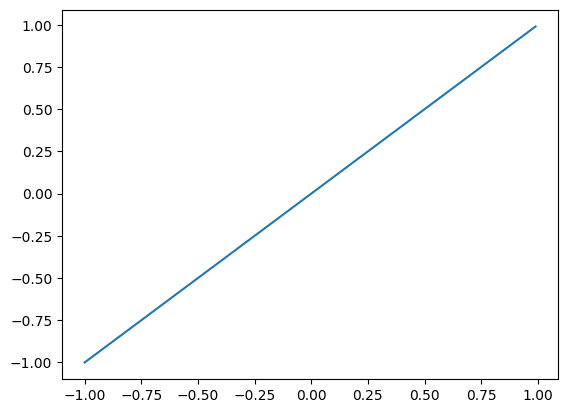

In [4]:
# Distinguer deux catégories de points
# (en 2D) rélatif par rapport à une droite
# séparant l'espace

a = 0 
b = 1

x = np.arange(-1,1,0.01)
y = a + b*x

fig, ax = plt.subplots()
ax.plot(x, y)


Text(0, 0.5, '$x_2$')

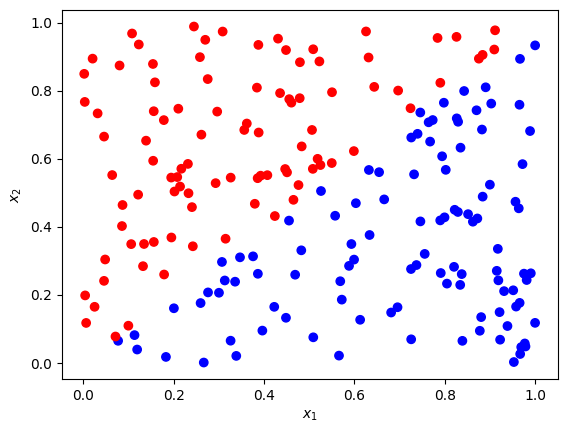

In [6]:


def category(p, a=0.0, b=1.):
    """Return +1 (-1) for points
    above (below) straight line 
    defined by y = a + b*x"""
    px, py = p
    y = a + b*px
    return 2*(py>y) - 1 

# nombre de points 
n = 200

# choisir des points aléatoires 
ps = np.random.uniform(size=(n,2))

#  sortie souhaitée pour les points
cats = np.array([category(p) for p in ps])

# nous colorions les points en fonction de leur 
# catégorie en bleu ou rouge
colors = np.array(['b','r'])[(cats+1)//2]

fig, ax = plt.subplots()
ax.scatter(*ps.T, c=colors)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

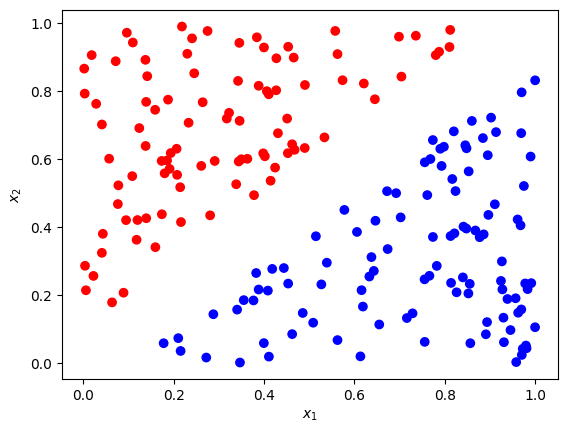

In [8]:

# nous pouvons faciliter l'apprentissage en
# imposant une séparation de taille finie entre
# les points des deux catégories
sep = 0.1

ps[cats==1] *= 1-sep
ps[cats==1,1] += sep

ps[cats==-1] *= 1-sep
ps[cats==-1,0] += sep

# nous colorions les points en fonction de leur 
# catégorie en bleu ou rouge
colors = np.array(['b','r'])[(cats+1)//2]

fig, ax = plt.subplots()
ax.scatter(*ps.T, c=colors)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Reste l'implémentation de la règle d'apprentissage ! Nous allons commencer avec un seuil et des poids synaptiques aléatoires, puis mettre à jour le paramètres avec chaque nouveau point que nous considérons.

In [36]:
# initialisation des paramètres
w0 = np.random.uniform(-1,1,2)
b0 = np.random.uniform(-1,1)


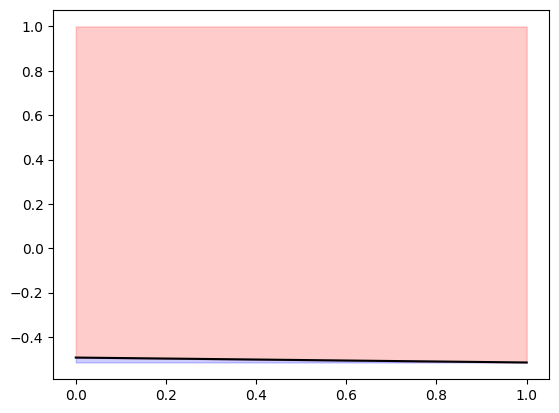

In [37]:
w = w0
b = b0

# A chaque étape, nous pouvons plotter 
# comment le perceptron sépare l'espace 
# en deux catégories
x = np.array([0,1])

fig, ax = plt.subplots()
y = -(b+w[0]*x)/w[1]
ax.plot(x, y, 'k')
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], color='b', alpha=0.2)
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], color='r', alpha=0.2)

# --> plotter les points déjà utilisés selon 
# (par ex. pour les 5 premiers points)
i = 0
ax.scatter(ps[:i,0], ps[:i,1], c=colors[:i])

In [18]:
w, b

(array([ 0.12843412, -0.86646177]), -0.09380171301789475)

Predit : -1
Vrai : 1


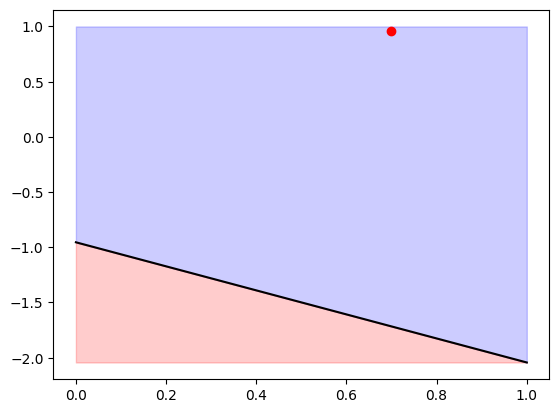

In [28]:
# 1) prendre le prochain point de la liste 'ps' 
#    --> calcuer la catégorie assignée par le perceptron avant la mise à jour

i = 0
px, py = ps[i]
yihat = int(np.sign( sum(w*ps[i]) + b ))
#print(w*ps[i])
print('Predit :', yihat)
print('Vrai :', cats[i])

fig, ax = plt.subplots()
y = -(b+w[0]*x)/w[1]
ax.plot(x, y, 'k')
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], color='b', alpha=0.2)
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], color='r', alpha=0.2)

# --> plotter les points déjà utilisés selon 
# (par ex. pour les 5 premiers points)#
i = 1
ax.scatter(ps[:i,0], ps[:i,1], c=colors[:i])

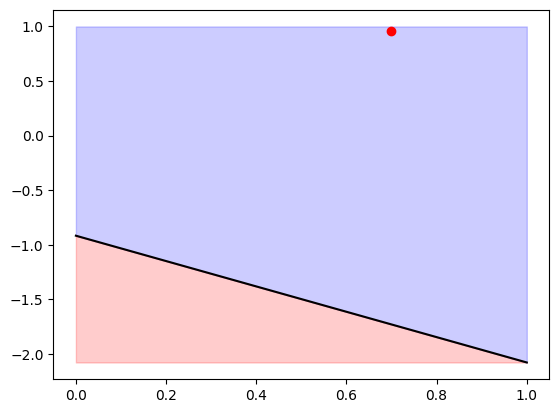

In [29]:
# 2) comparaison entre la vraie catégorie et la catégorie assignée
#    2.a) les deux sont identiques --> retourner au point 1)
#    2.b) les deux diffèrent --> continuer avec 3)

eta = 0.5

if yihat != cats[i]:
    b = b + eta*cats[i]
    w = w + eta*cats[i]*ps[i]

fig, ax = plt.subplots()
y = -(b+w[0]*x)/w[1]
ax.plot(x, y, 'k')
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], color='b', alpha=0.2)
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], color='r', alpha=0.2)

# --> plotter les points déjà utilisés selon 
# (par ex. pour les 5 premiers points)#
i = 1
ax.scatter(ps[:i,0], ps[:i,1], c=colors[:i])

In [ ]:
# 3) mettre à jour les paramètres du perceptron



In [30]:
# 4) continuer avec 1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


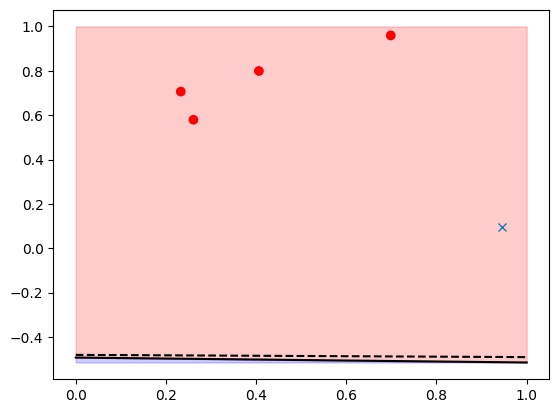

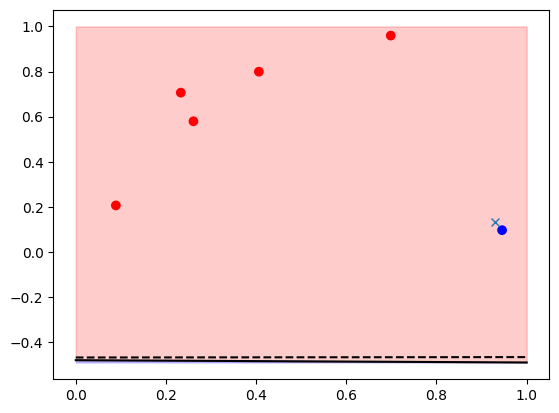

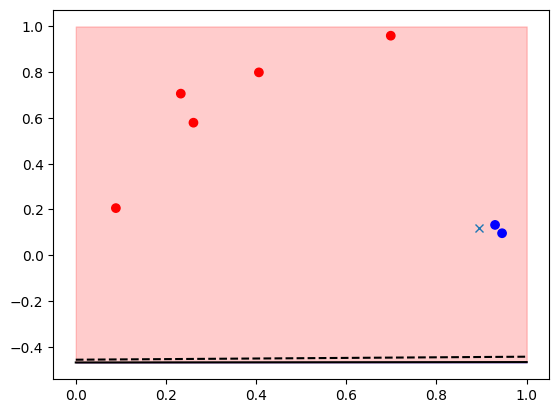

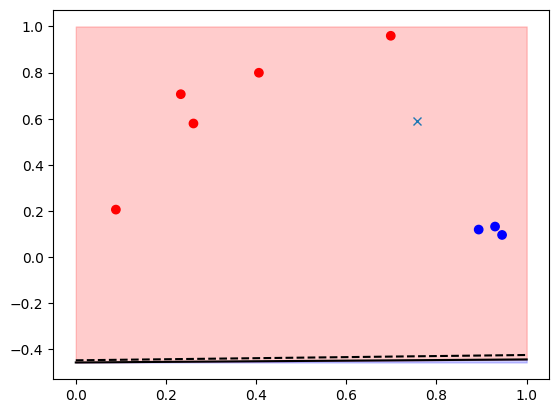

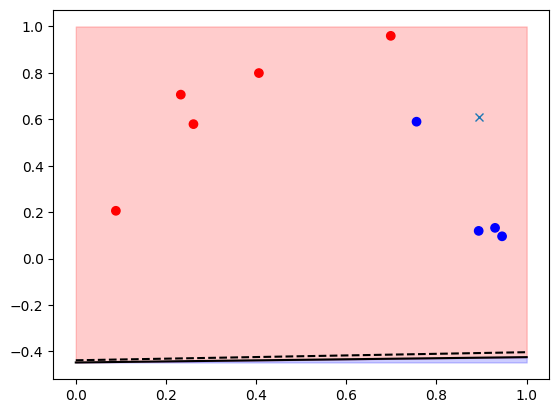

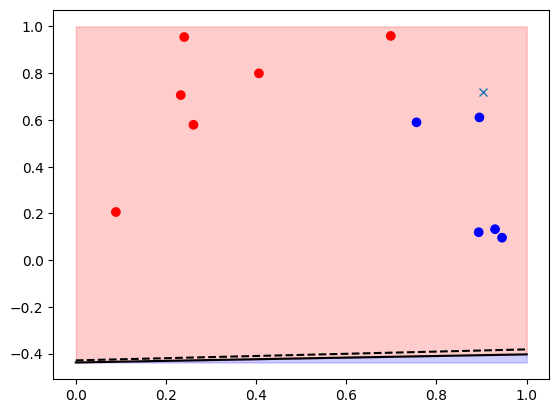

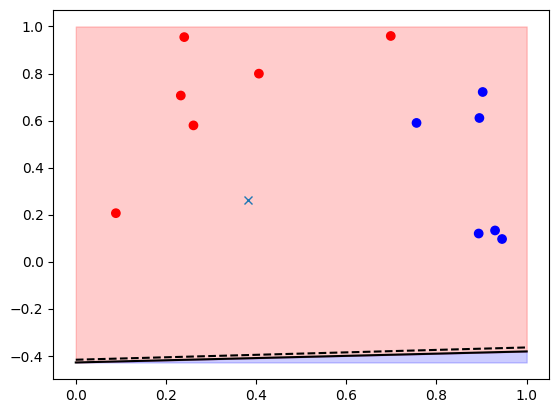

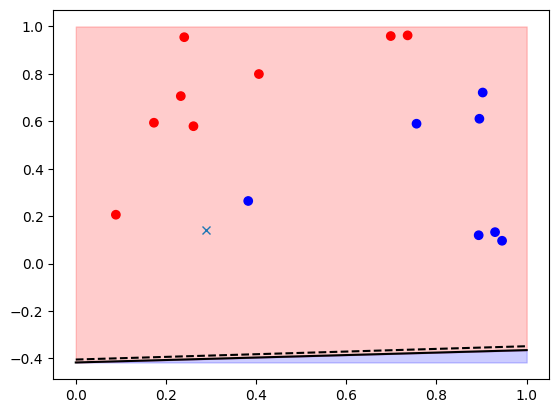

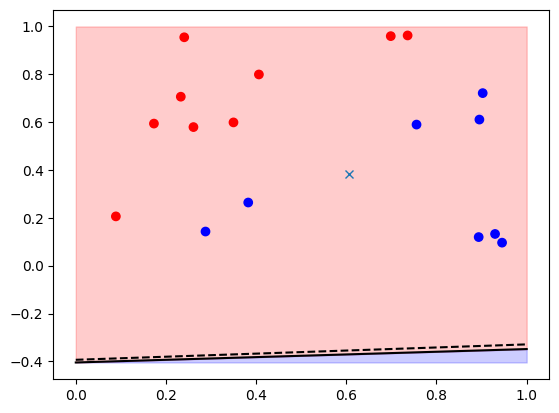

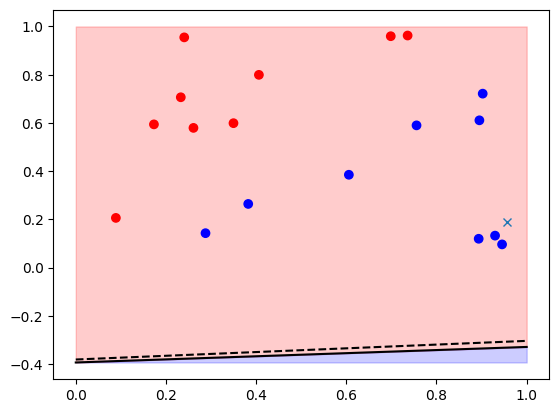

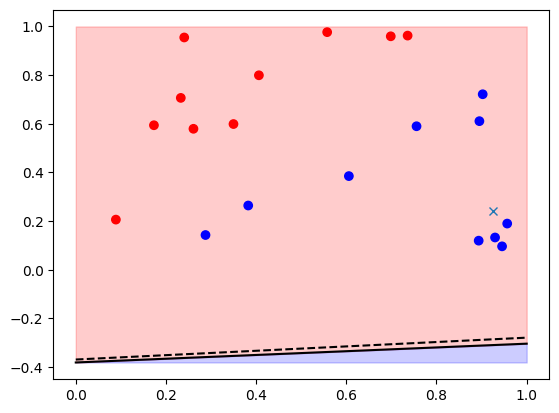

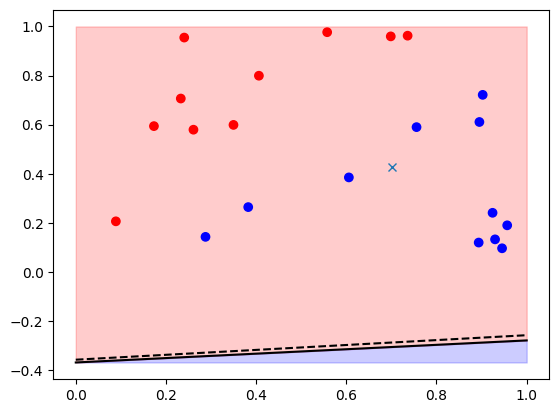

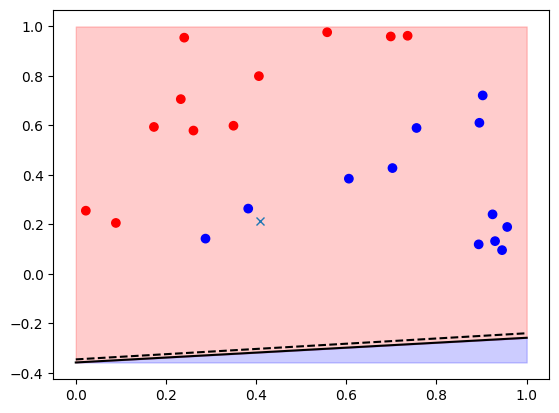

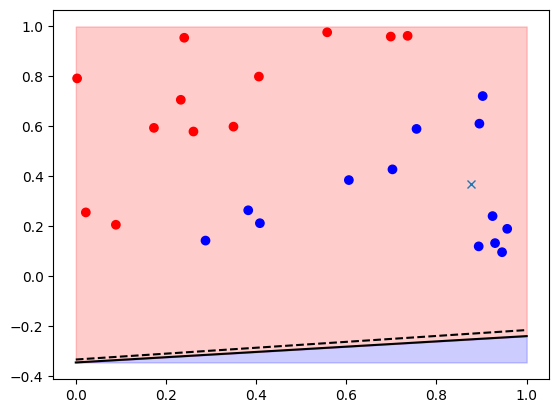

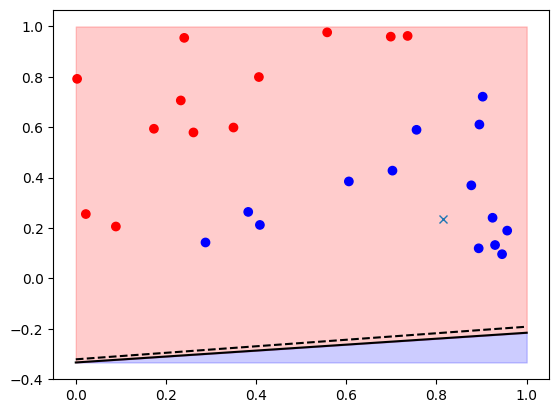

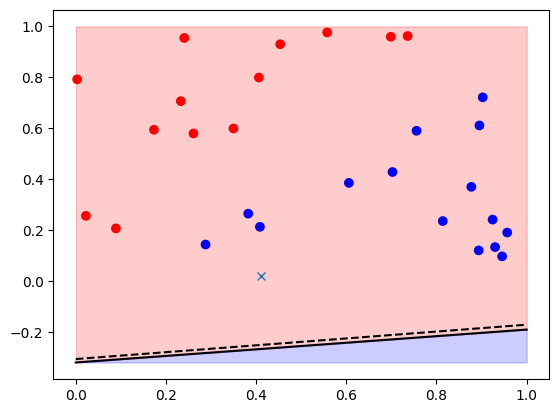

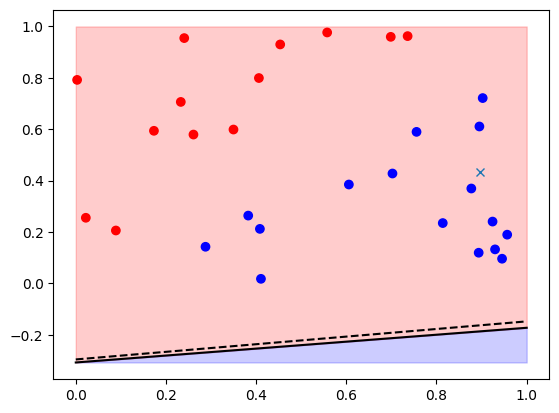

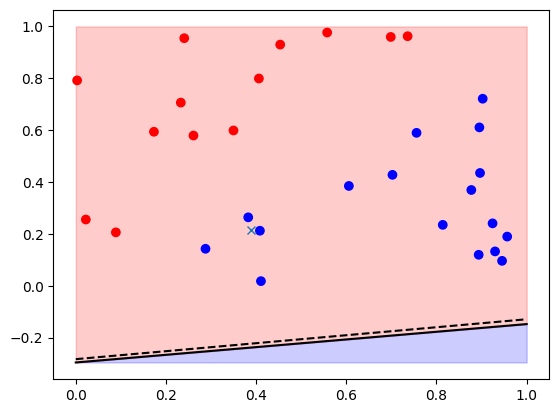

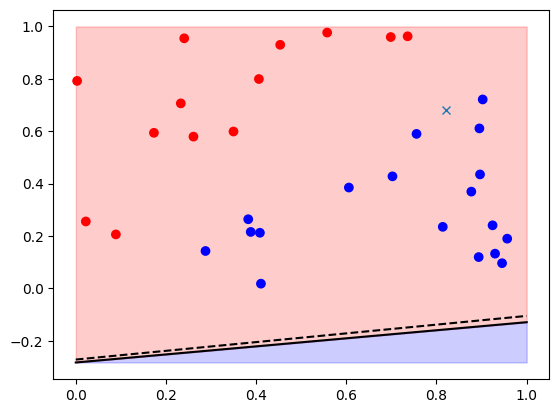

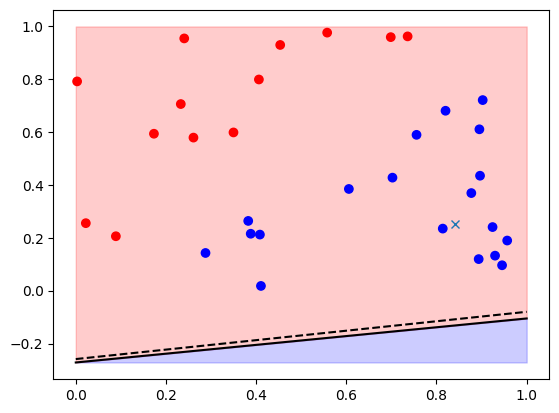

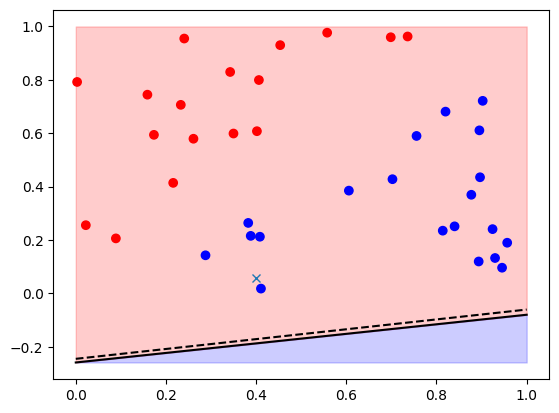

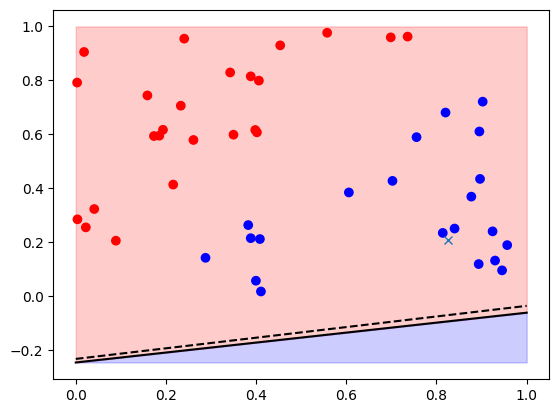

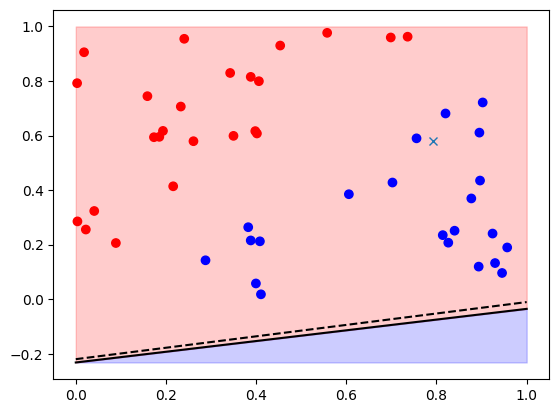

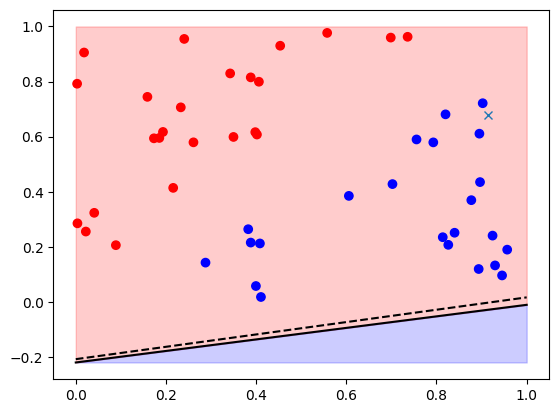

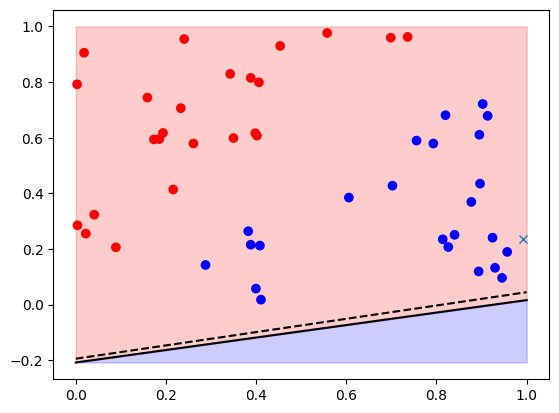

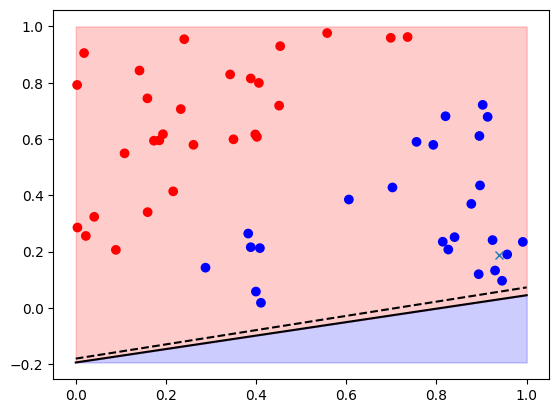

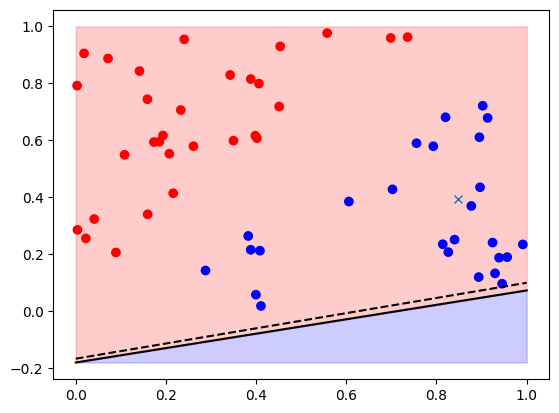

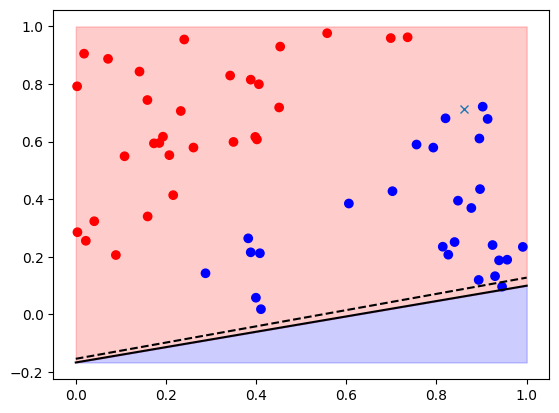

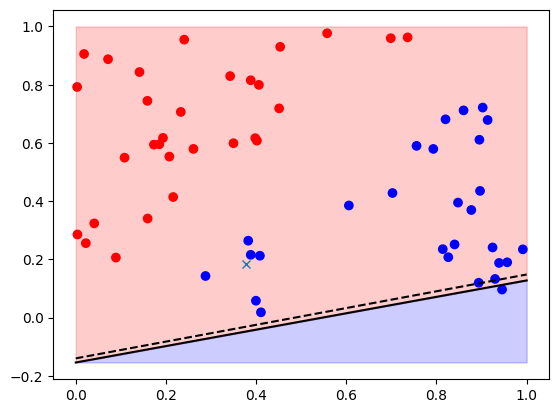

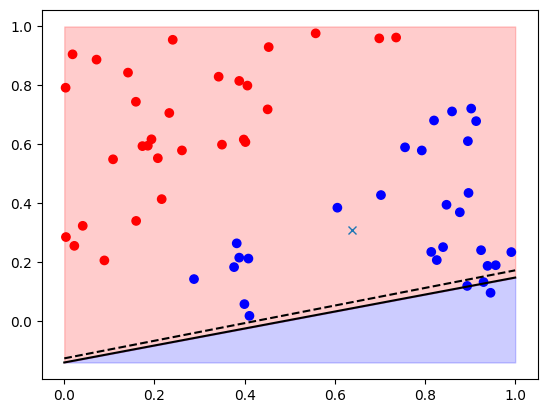

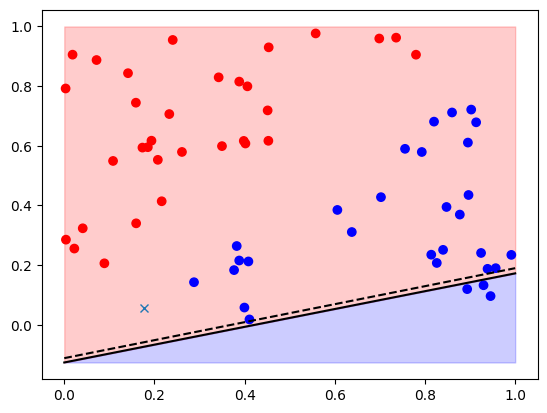

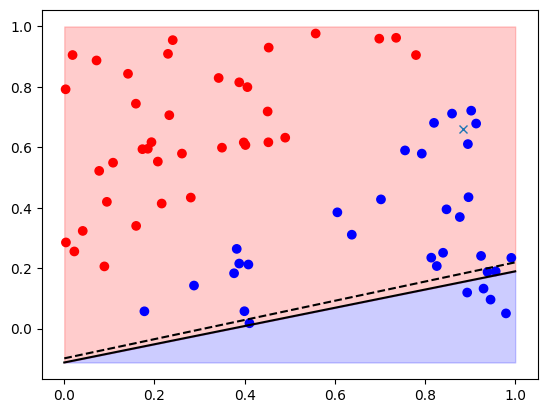

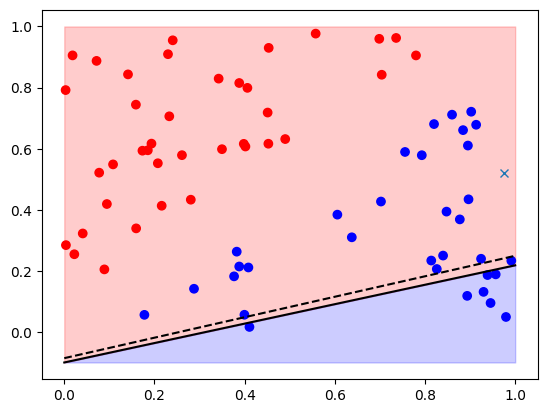

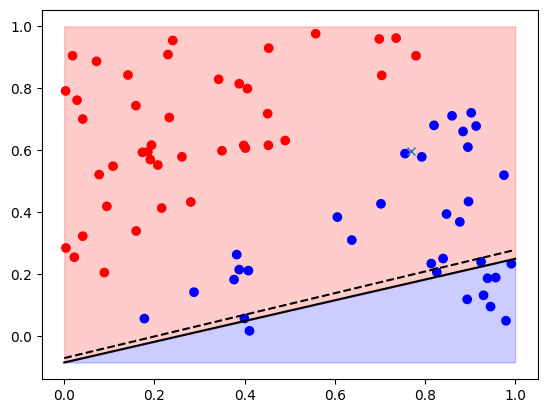

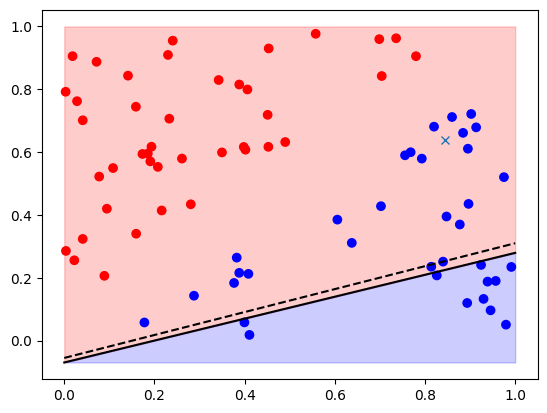

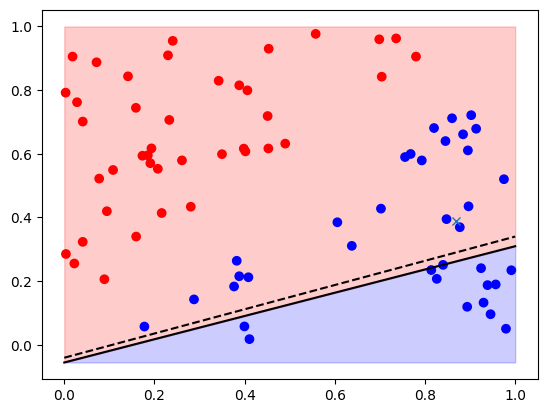

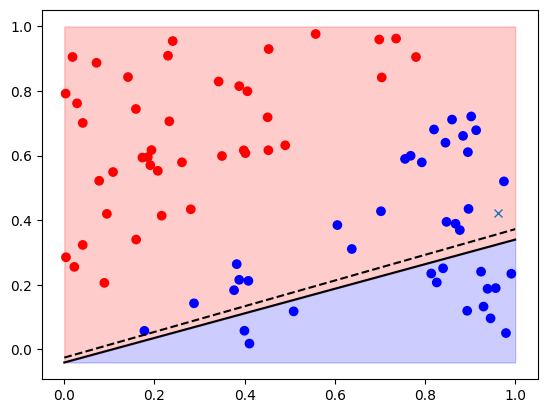

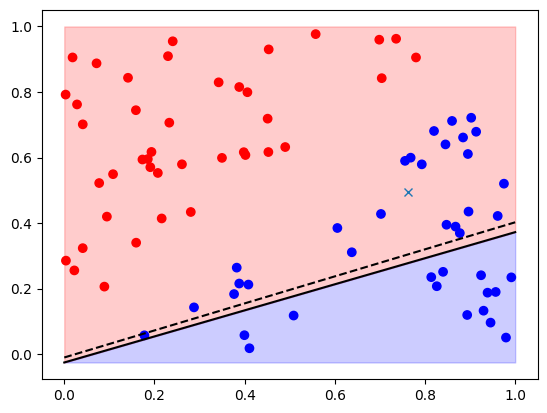

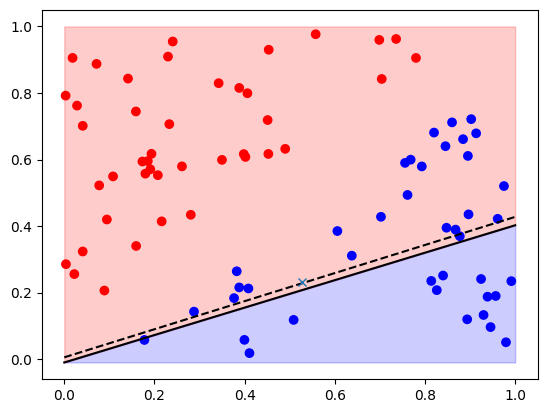

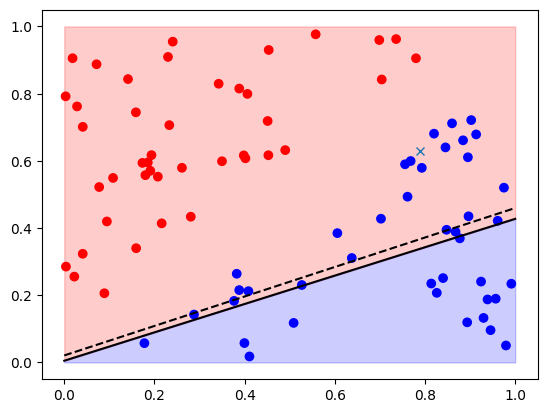

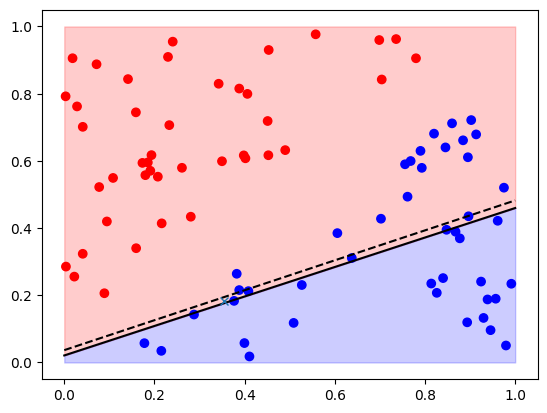

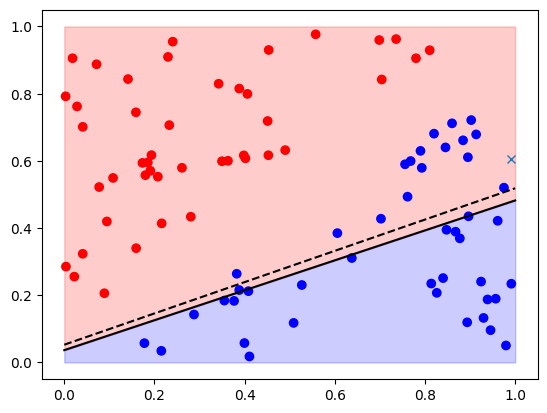

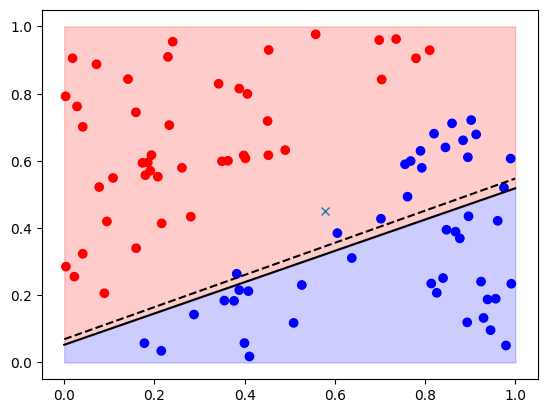

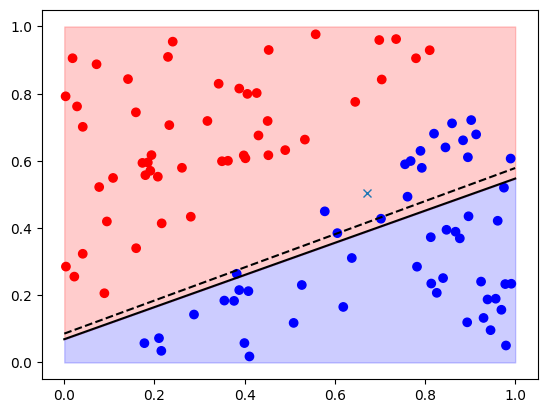

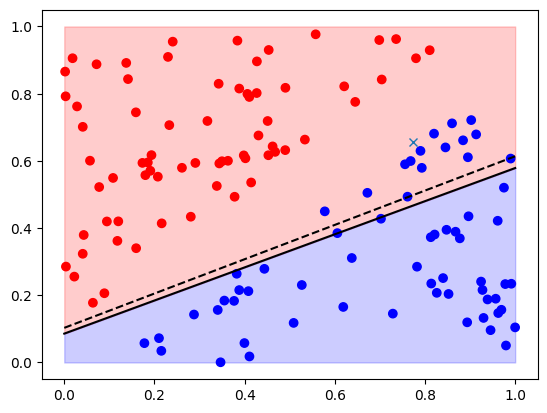

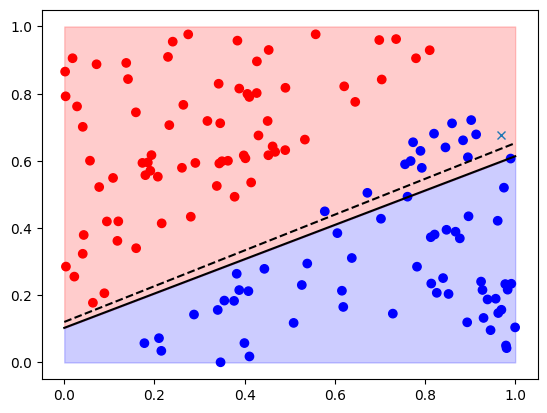

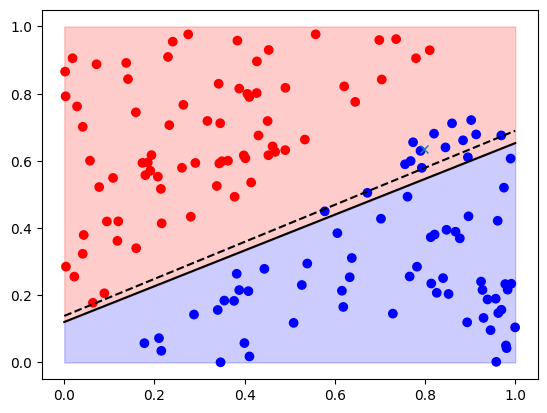

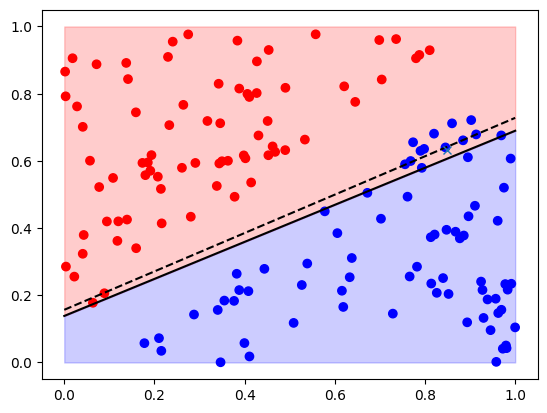

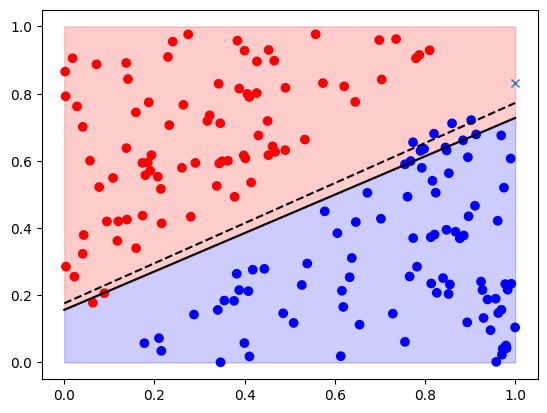

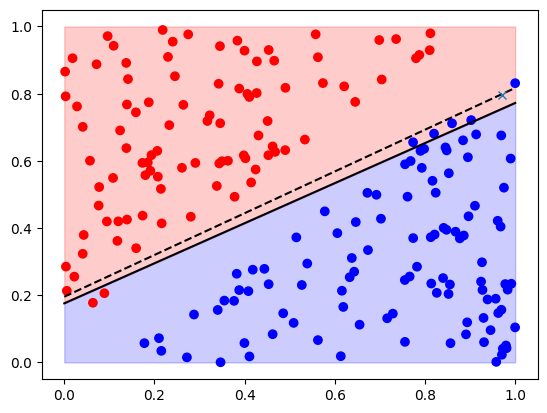

In [42]:
w = w0
b = b0
eta = 0.01

for i in range(n):
    # 1) prendre un point et prédire la catégorie
    yihat = int(np.sign( sum(w*ps[i]) + b ))

    # 2) la comparaison     
    if yihat == cats[i]:
        continue

    # plot du perceptron avant mis à jour
    fig, ax = plt.subplots()
    y = -(b+w[0]*x)/w[1]
    ax.plot(x, y, 'k')
    ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], color='b', alpha=0.2)
    ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], color='r', alpha=0.2)

    # 3) mis à jour des paramètres
    b = b + eta*cats[i]
    w = w + eta*cats[i]*ps[i]

    # plot du perceptron après mis à jour
    y = -(b+w[0]*x)/w[1]
    ax.plot(x, y, 'k--')

    # --> plotter les points déjà utilisés selon 
    # (par ex. pour les 5 premiers points)#
    ax.scatter(ps[:i,0], ps[:i,1], c=colors[:i])
    ax.plot(*ps[i], 'x')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aba89c40-4d80-43b4-8007-96b61ce30742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>